As an analyst for Model Fitness this is a step towards developing a customer interaction survey. The goal is to identify what type of customers are more prone to churning. The data provided contains churn data for the current and preceding month as well as a customer's account information. Through machine learning we will be able to identify the type of customers that stay and those who are more likely to churn.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


# Data Preprocessing

The first step is to check the quality of the data to verify if it has any missing values or categorical values. Investing the mean values as well will allow me to understand the data better and make some initial insights. 


In [2]:
gym_df= pd.read_csv('gym_churn_us.csv')

In [3]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym_df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
gym_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


I have there are no missing values and  no categorical data types. The mean values suggest that there is an even split between men and women. With a mean value of 0.84 and a standard deviation of .36 it also seems that most of the customers live near the gym's location. A small mean value of 0.31 suggests that most of the clients did not start their membership as part of the 'Bring a friend' promotion. The average customer age is 29 and has 4 months left on their contract. 


# Initial Data Analysis

My next step is to split the data into two groups, those who churned and those who did not and study the mean values for each group.


In [6]:
churn_df=gym_df.groupby('Churn')
churn_df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


In [7]:
pd.options.display.max_rows = 104
churn_df.describe().T


Churn                                              0            1
gender                            count  2939.000000  1061.000000
                                  mean      0.510037     0.510839
                                  std       0.499984     0.500118
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
Near_Location                     count  2939.000000  1061.000000
                                  mean      0.873086     0.768143
                                  std       0.332933     0.422217
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
Partner                           count  2939.000000  1061.000000
                                  mean      0.534195     0.355325
                                  std       0.498914     0.478837
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       1.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
Promo_friends                     count  2939.000000  1061.000000
                                  mean      0.353522     0.183789
                                  std       0.478144     0.387495
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     0.000000
                                  max       1.000000     1.000000
Phone                             count  2939.000000  1061.000000
                                  mean      0.903709     0.902922
                                  std       0.295040     0.296204
                                  min       0.000000     0.000000
                                  25%       1.000000     1.000000
                                  50%       1.000000     1.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
Contract_period                   count  2939.000000  1061.000000
                                  mean      5.747193     1.728558
                                  std       4.716942     2.132371
                                  min       1.000000     1.000000
                                  25%       1.000000     1.000000
                                  50%       6.000000     1.000000
                                  75%      12.000000     1.000000
                                  max      12.000000    12.000000
Group_visits                      count  2939.000000  1061.000000
                                  mean      0.464103     0.268615
                                  std       0.498795     0.443448
                                  min       0.000000     0.000000
                                  25%       0.000000     0.000000
                                  50%       0.000000     0.000000
                                  75%       1.000000     1.000000
                                  max       1.000000     1.000000
Age                               count  2939.000000  1061.000000
                                  mean     29.976523    26.989632
                                  std       3.009933     2.895163
                                  min   

The mean values for customers who did NOT churn:

There is still an even split of gender (0.51), more live closer to the gym with a mean value 0.87 with sd of 0.33. Those who did not churn have a higher mean value of belonging to partner companies (0.534) and not many came from promo friends but higher than the churn group at 0.35. This group also has a longer contract period, avg of 5.75, higher group visits at 0.46, and accrued more additional chrges at 158. This group also went to more classes with a mean value of 2.02.

The mean values for customers who DID churn:

There is an even split of gender between the genders (0.51) and most live near the location(.77). There is a mean value of 0.355 for being part of a partner company whih suuggests that most are not. This group has a lower mean value for their contract period at 1.72 with a standard deviation of 2.13. The mean value of group visits is also lower at 0.27. The mean value for this group's additional charge is 115 with a standard deviation of 77.7. 

Let's plot histograms that will display the feature distribution for the group of cients that did not churn.

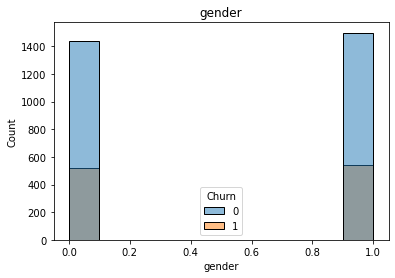

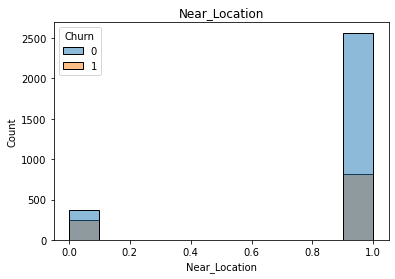

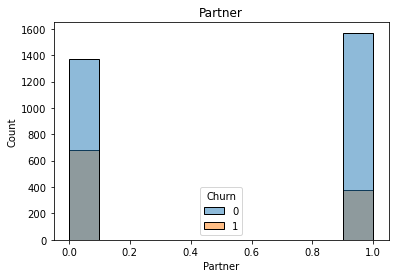

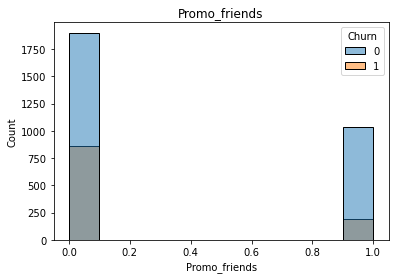

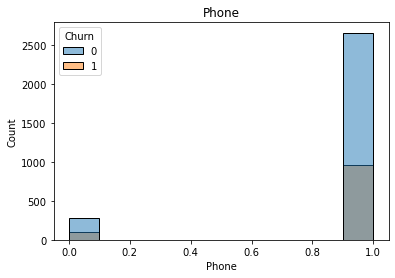

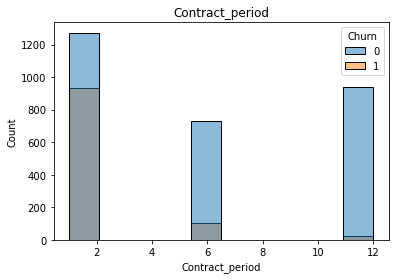

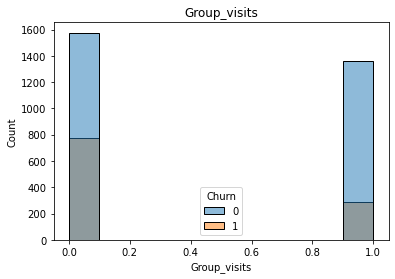

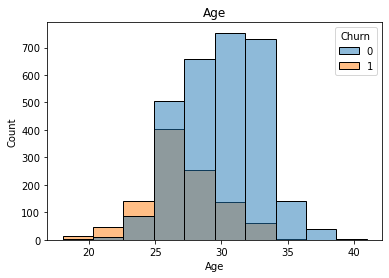

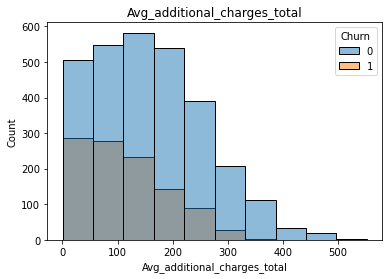

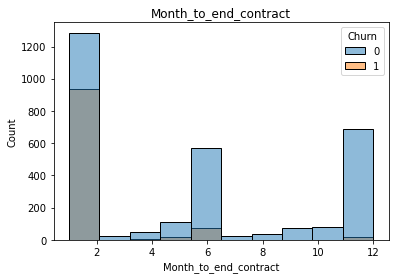

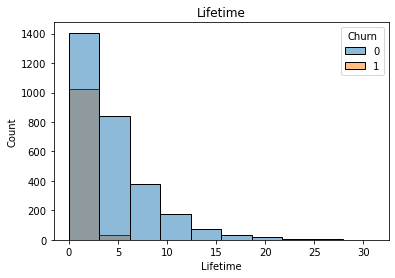

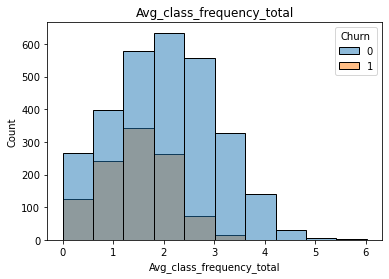

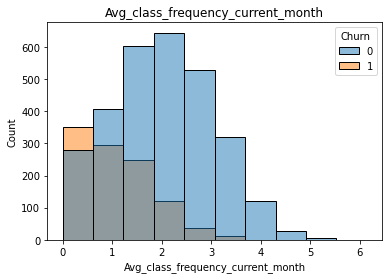

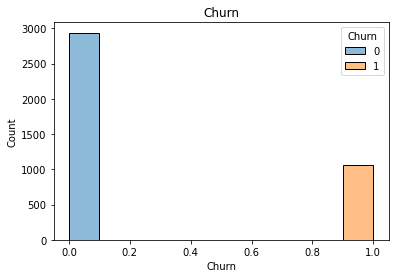

In [8]:
for column in gym_df.columns:
    sns.histplot(gym_df, x=column, bins=10, hue='Churn')
    plt.title(column)
    plt.show()

The values for the average additional charge total is skewed to the right, as well is the lifetime feature. Average class frequency is a little skewed and there don't seem to be any major outliers.

Now I would like to check if there is any correlation between the features and the target (churn) or between the features themselves.

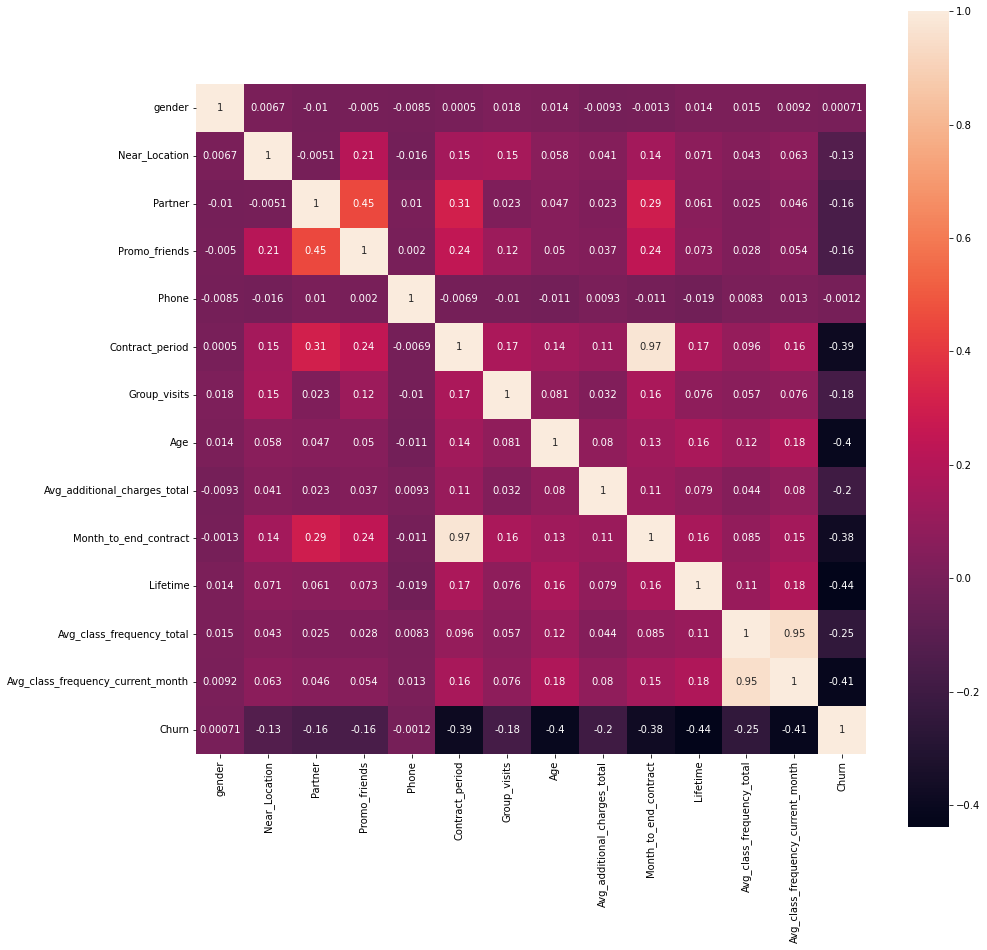

In [9]:
gym_corr=gym_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(gym_corr,annot=True,square=True)
plt.show()

There is a strong correlation between contract period and month to end of contract and another strong correlation between avg_ class frequency and avg class frequency current month. This makes sense as both features are measuring the same thing. In an attempt to optimize the model, I will drop month to end and avg classs frequency. 

In [10]:
gym_df=gym_df.drop(['Month_to_end_contract','Avg_class_frequency_current_month'],axis=1)

# Model Building

Now that I am done pre-processing and the data and checking the distributions, I will build a binary classification model for customers where the target feature is the user's leaving next month

First step is to divide the data into train and validation sets using the train_test_split() 

In [11]:
#creating the feature matrix and the target variable
X = gym_df.drop(['Churn'], axis=1)
y= gym_df['Churn']

In [12]:
#splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

I will be working with and comparing two models: Logistic Regression and Random Forest. I will train the models, have them calculate predictions and then compare their metrics.

In [13]:
X_train

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
2702,1,1,1,0,1,6,1,31,56.345649,3,0.000000
1709,1,1,0,0,1,12,1,25,161.385863,2,3.179597
907,0,1,0,1,1,6,1,30,175.561159,2,1.134427
1991,0,1,1,1,1,6,1,25,49.844578,0,2.386860
3680,0,1,0,1,0,12,1,29,148.153962,2,1.593649
...,...,...,...,...,...,...,...,...,...,...,...
1109,0,1,0,0,1,12,0,29,231.748240,1,3.132211
2313,0,1,0,0,1,12,1,30,466.027640,1,3.519716
3630,1,1,0,0,1,1,1,32,184.779344,2,2.541021
1836,0,1,0,0,1,6,0,32,101.209266,16,3.001786


In [14]:
#logistic regression
lo_model= LogisticRegression(random_state=0, max_iter=1000)
lo_model.fit(X_train,y_train)
lo_pred= lo_model.predict(X_test)
lo_prob= lo_model.predict_proba(X_test)[:,1]

In [15]:
#metrics for logistic regression
print(f'Accuracy: {accuracy_score(y_test,lo_pred)}')
print(f'Precision: {precision_score(y_test,lo_pred):.2f}')
print(f'Recall: {recall_score(y_test,lo_pred):.2f}')



Accuracy: 0.90625
Precision: 0.82
Recall: 0.83


In [16]:
#random forest
rf_model= RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)
rf_prob= rf_model.predict_proba(X_test)[:,1]

In [17]:
#metrics for random forest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test,rf_pred)))

Accuracy: 0.89
Precision: 0.81
Recall: 0.79


Though the models are very close in similarity, Random Forst performs a bit better as evidenced by having higher metrics of Accuracy, Precision, and Recall. 

# User Clusters

Now I will split the data into clusters to ascertain which type of customer is more likely to churn. The first step to this is to standardize the data.

In [18]:
#Standardize the data using StandardScaler()
sc = StandardScaler()
X_sc=sc.fit_transform(X)


I will also be using the linkage() function to build a matrix of distances based on the standardized feature matrix (X_sc) and then I will visualize this using a dendogram which I will analyze to determine how many clusters I want. 

In [19]:
link=linkage(X_sc, method='ward')


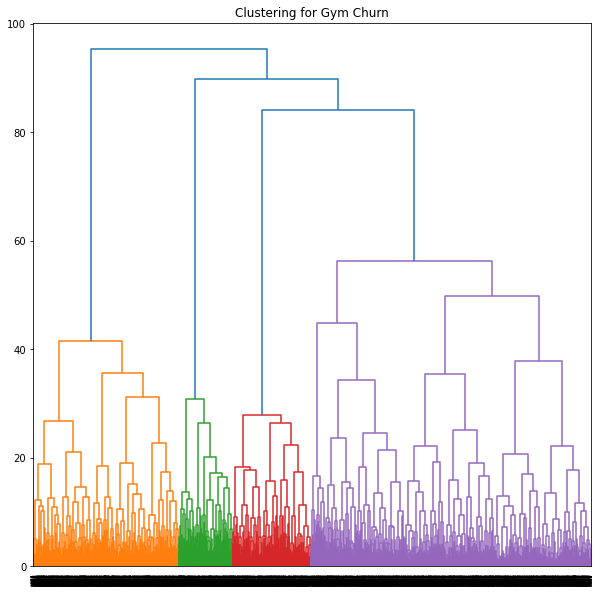

In [20]:
plt.figure(figsize=(10, 10))  
dendrogram(link, orientation='top')
plt.title('Clustering for Gym Churn')
plt.show()

Based on the dendogram I will be using 5 clusters in my KMeans model. 


In [21]:
km=KMeans(n_clusters=5, random_state=0)
labels=km.fit_predict(X_sc)

Now that we have our cluster, I will be looking at the mean feature values for each.

In [22]:
gym_df['cluster']=labels

In [23]:
pd.options.display.max_rows = 104
gym_df.groupby('cluster').describe().T

cluster                                      0            1            2  \
gender                       count  561.000000  1050.000000  1132.000000   
                             mean     0.499109     0.488571     0.505300   
                             std      0.500445     0.500108     0.500193   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     0.000000     0.000000   
                             50%      0.000000     0.000000     1.000000   
                             75%      1.000000     1.000000     1.000000   
                             max      1.000000     1.000000     1.000000   
Near_Location                count  561.000000  1050.000000  1132.000000   
                             mean     0.000000     0.995238     1.000000   
                             std      0.000000     0.068875     0.000000   
                             min      0.000000     0.000000     1.000000   
                             25%      0.000000     1.000000     1.000000   
                             50%      0.000000     1.000000     1.000000   
                             75%      0.000000     1.000000     1.000000   
                             max      0.000000     1.000000     1.000000   
Partner                      count  561.000000  1050.000000  1132.000000   
                             mean     0.488414     0.955238     0.238516   
                             std      0.500312     0.206879     0.426364   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     1.000000     0.000000   
                             50%      0.000000     1.000000     0.000000   
                             75%      1.000000     1.000000     0.000000   
                             max      1.000000     1.000000     1.000000   
Promo_friends                count  561.000000  1050.000000  1132.000000   
                             mean     0.076649     0.892381     0.059187   
                             std      0.266271     0.310046     0.236079   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     1.000000     0.000000   
                             50%      0.000000     1.000000     0.000000   
                             75%      0.000000     1.000000     0.000000   
                             max      1.000000     1.000000     1.000000   
Phone                        count  561.000000  1050.000000  1132.000000   
                             mean     1.000000     1.000000     1.000000   
                             std      0.000000     0.000000     0.000000   
                             min      1.000000     1.000000     1.000000   
                             25%      1.000000     1.000000     1.000000   
                             50%      1.000000     1.000000     1.000000   
                             75%      1.000000     1.000000     1.000000   
                             max      1.000000     1.000000     1.000000   
Contract_period              count  561.000000  1050.000000  1132.000000   
                             mean     3.032086     7.660952     2.819788   
                             std      3.538922     4.679153     3.323314   
                             min      1.000000     1.000000     1.000000   
                             25%      1.000000     1.000000     1.000000   
                             50%      1.000000     6.000000     1.000000   
                             75%      6.000000    12.000000     6.000000   
                             max     12.000000    12.000000    12.000000   
Group_visits                 count  561.000000  1050.000000  1132.000000   
                             mean     0.235294     0.458095     0.000000   
                             std      0.424561     0.498478     0.000000   
                             min      0.000000  

There is a big difference in mean values for the 'partner' parameter, with those in cluster 2 and 3 having a low value of .24 and .25 and those in cluster 1 having a much higher value at .95(meaning most of them were affiliated with partner companies).

Cluster 1 has the highest mean value for lifetime membership at 4.4 with clsuter 0 having the lowest at 3.06.

When it comes to average additional charges, cluster 1 has the highest mean value at 155 with cluster 0 having the lowest at 137.5.

Those in cluster 1 have a much higher contract period at a mean value of 7.67 while the other clusters have mean values that range from 2 to 4 which also lends to a higher mean value for month to end of contract. Cluster 3 had the highest mean value for group visits and cluster 2 had the lowest.

Now I am going to plot the distribution of the numerical features of each cluster.

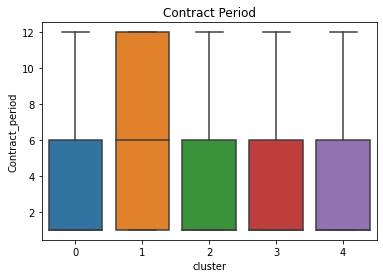

In [24]:
#Contract period
sns.boxplot(data=gym_df, x='cluster', y='Contract_period')
plt.title('Contract Period')
plt.show()

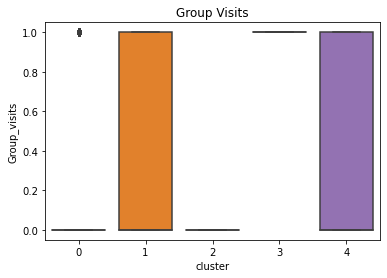

In [25]:
#Group visits
sns.boxplot(data=gym_df, x='cluster', y='Group_visits')
plt.title('Group Visits')
plt.show()

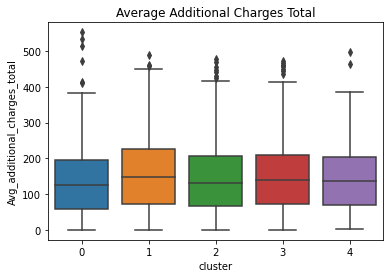

In [26]:
#Average Additional Charges Total
sns.boxplot(data=gym_df, x='cluster', y='Avg_additional_charges_total')
plt.title('Average Additional Charges Total')
plt.show()

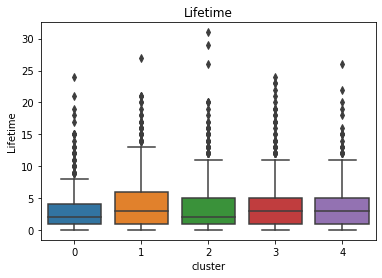

In [27]:
#Lifetime
sns.boxplot(data=gym_df, x='cluster', y='Lifetime')
plt.title('Lifetime')
plt.show()

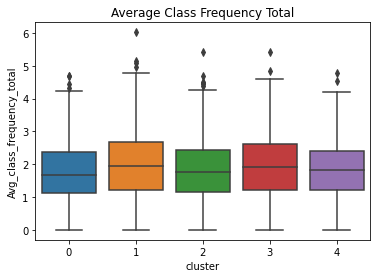

In [28]:
#Average Class Frequency Total
sns.boxplot(data=gym_df, x='cluster', y='Avg_class_frequency_total')
plt.title('Average Class Frequency Total')
plt.show()

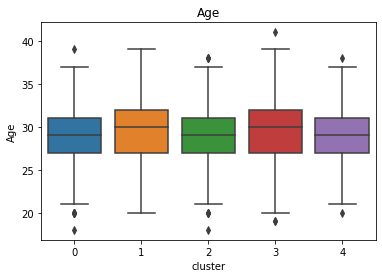

In [29]:
#Age
sns.boxplot(data=gym_df, x='cluster', y='Age')
plt.title('Age')
plt.show()

For the most part these distributions are similar to the ones above where the Lifetime and average additional charges are skewed to the right. The age features tends to be normally distributed for all clusters.
For average additional charges total cluster 0 has the most variance. Cluster 1 has the highest observation for average class frequency.

My final step will be calculating the churn rate for each cluster to see if they differ. This will also shend light on which clusters are prone to leaving.
I will be calculating the churn rate within the individual clusters and also from the dataframe as a whole.

In [36]:
gym_df.groupby('cluster')['Churn'].mean()

cluster
0    0.399287
1    0.120952
2    0.381625
3    0.200918
4    0.266839
Name: Churn, dtype: float64

Churn rate for clusters:

0- 40%

1- 12%

2- 38%

3- 20%

4- 27%

There's a great difference between clusters with those 40% of clients in cluster 0 churning versus only 12% in cluster 1. Those prone to leaving belong in clusters 0 and 2, with those that are more likely to be loyal belonging to cluster 1 and 3. 

# Conclusions and Recommendations

In [35]:
gym_df.groupby('cluster').describe().T

cluster                                      0            1            2  \
gender                       count  561.000000  1050.000000  1132.000000   
                             mean     0.499109     0.488571     0.505300   
                             std      0.500445     0.500108     0.500193   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     0.000000     0.000000   
                             50%      0.000000     0.000000     1.000000   
                             75%      1.000000     1.000000     1.000000   
                             max      1.000000     1.000000     1.000000   
Near_Location                count  561.000000  1050.000000  1132.000000   
                             mean     0.000000     0.995238     1.000000   
                             std      0.000000     0.068875     0.000000   
                             min      0.000000     0.000000     1.000000   
                             25%      0.000000     1.000000     1.000000   
                             50%      0.000000     1.000000     1.000000   
                             75%      0.000000     1.000000     1.000000   
                             max      0.000000     1.000000     1.000000   
Partner                      count  561.000000  1050.000000  1132.000000   
                             mean     0.488414     0.955238     0.238516   
                             std      0.500312     0.206879     0.426364   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     1.000000     0.000000   
                             50%      0.000000     1.000000     0.000000   
                             75%      1.000000     1.000000     0.000000   
                             max      1.000000     1.000000     1.000000   
Promo_friends                count  561.000000  1050.000000  1132.000000   
                             mean     0.076649     0.892381     0.059187   
                             std      0.266271     0.310046     0.236079   
                             min      0.000000     0.000000     0.000000   
                             25%      0.000000     1.000000     0.000000   
                             50%      0.000000     1.000000     0.000000   
                             75%      0.000000     1.000000     0.000000   
                             max      1.000000     1.000000     1.000000   
Phone                        count  561.000000  1050.000000  1132.000000   
                             mean     1.000000     1.000000     1.000000   
                             std      0.000000     0.000000     0.000000   
                             min      1.000000     1.000000     1.000000   
                             25%      1.000000     1.000000     1.000000   
                             50%      1.000000     1.000000     1.000000   
                             75%      1.000000     1.000000     1.000000   
                             max      1.000000     1.000000     1.000000   
Contract_period              count  561.000000  1050.000000  1132.000000   
                             mean     3.032086     7.660952     2.819788   
                             std      3.538922     4.679153     3.323314   
                             min      1.000000     1.000000     1.000000   
                             25%      1.000000     1.000000     1.000000   
                             50%      1.000000     6.000000     1.000000   
                             75%      6.000000    12.000000     6.000000   
                             max     12.000000    12.000000    12.000000   
Group_visits                 count  561.000000  1050.000000  1132.000000   
                             mean     0.235294     0.458095     0.000000   
                             std      0.424561     0.498478     0.000000   
                             min      0.000000  

The goal of this report was to identify the type of customer that is more likely to churn and the type of customer that tends to stay loyal to Model Fitness. To do this first I had to pre-proess the data to determine if there were any missing values or categorical data types that would need to be converted. After this I analyzed the mean values of all the features of the dataframe as a whole and then split into two groups (does who churned and does who did not). There were differences in the mean values of these groups with loyal customers taking classes more frequently and spending more money on additional charges. The mean values also showed that the loyal customers had longer membership plans. 

My next step was then training two models (Logistic Regression and Random Forest) and then comparing their metrics (Precision, Accuracy, and Recall) to see which model was better at predicting whether or not a customer would churn. Though the metrics were close, Random Forest Classifier performed better.

The next goal was to form clusters with the clients to be able to pinpoint the commonalities between customers and to find the tpye of the customer that is more likely to churn. In plotting a dendogram and using KMeans I was left with 5 different clusters that had unique mean values across the features. 

My conclusion from my analyses is that customers who belong in cluster 0 or 2 are more likely to churn while those in cluster 1 and 4 are more prone to staying loyal.

My recommendation would be to focus on the following principles--

Additional charges: Gear more marketing resources towards promoting and advertising the secondary services the gym provides such as the cafe, athletic goods and massages. I would also suggest perhaps making a sale with the massage services such as get 1 massage and get the next one at a discounted rate. The data shows that those who spent more money additional charges were less likely to churn.

Group visits: As customers with higher group visits are more likely to remain loyal, I would offer promotions that are geared towards groups. Perhaps also throwing in a discounted or free service such as merchandise to clients who come in with groups of 3 or more. 

Class attendance: In order to boost class attendance I would recommend emailing out a survey to the customer base to get their thoughts on what kind of classes they would like to see offered. Getting new classes in that cater to the interest of the clients may encourage them to attend more classes. Customers with high class attendance are not as likely to churn.

For example: Sugggestions in action for cluster 0--


For clients in cluster 0 I would suggest offering them a discount: a buy one get one at 50% discount rate for massages and also give them a punch card for the cafe. Once they make their 10th purchase, they can get a free beverage. I would also send out surveys to those in cluster 0 asking them to fill in what kind of classes they would like to see offered. Once they complete that survey, they will be rewarded with a one-time free pass for a class.
